In [1]:
import os

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
file_name = 'df_noisy_out_census_dp_rho=2.65_use_constraints=False.csv'
df = pd.read_csv(f'out/{file_name}')
error = df['avg_noisy_basic_alloc'] - df['calculated_basic_alloc']

print(error.sum())
df.head()

-1.3189855962991714e-07


,State FIPS Code,District ID,State,Name,basic_alloc,targeted_alloc,concentration_alloc,official_population_count,official_children_count,official_children_formula_count,...,noisy_children_formula_count,noisy_children_count,avg_noisy_basic_alloc,avg_noisy_concentration_alloc,avg_noisy_target_alloc,avg_noisy_children_formula_count,avg_noisy_children_count,calculated_basic_alloc,calculated_concentrated_alloc,calculated_targeted_alloc
0,1,190,ALABAMA,Alabaster City School District,404482.451481,159746.293284,0.000000,34669.0,6710.0,673.0,...,683,6728,417589.915838,0.000000,168059.897844,672.726,6710.319,417981.280355,0.000000,168414.128080
1,1,5,ALABAMA,Albertville City School District,738438.215814,498231.293705,180752.421632,22051.0,4131.0,970.0,...,978,4137,602325.998738,166962.688887,314096.492650,970.331,4130.601,602439.586842,167239.580002,314624.010751
2,1,30,ALABAMA,Alexander City City School District,493947.426734,353662.302968,122103.107993,16920.0,2575.0,708.0,...,698,2563,439682.717353,121878.591753,260367.418823,708.317,2574.723,439718.791221,122067.652208,260782.114101
3,1,60,ALABAMA,Andalusia City School District,245814.743916,144408.067790,62375.463078,8842.0,1465.0,409.0,...,405,1453,253852.806915,70367.205451,151936.673507,408.950,1464.338,254018.341256,70516.482702,152243.650382
4,1,90,ALABAMA,Anniston City School District,662918.490317,510408.966121,168215.490893,22043.0,2957.0,1103.0,...,1114,2944,684611.095638,189771.894071,519237.360173,1102.890,2956.941,685042.128131,190170.367776,520508.918499


In [3]:
df['avg_noisy_concentrated_alloc'] = df['avg_noisy_concentration_alloc']
df['avg_noisy_targeted_alloc'] = df['avg_noisy_target_alloc']

df['basic_error'] = df['avg_noisy_basic_alloc'] - df['calculated_basic_alloc']
df['concentrated_error'] = df['avg_noisy_concentrated_alloc'] - df['calculated_concentrated_alloc']
df['targeted_error'] = df['avg_noisy_target_alloc'] - df['calculated_targeted_alloc']

df['calculated_total_alloc'] = df['calculated_basic_alloc'] + df['calculated_concentrated_alloc'] + df[
    'calculated_targeted_alloc']

df['avg_noisy_total_alloc'] = df['avg_noisy_basic_alloc'] + df['avg_noisy_concentrated_alloc'] + df[
    'avg_noisy_targeted_alloc']

df['official_children_formula_proportion'] = df['official_children_formula_count'] / df['official_children_count']
df['noisy_children_formula_proportion'] = df['avg_noisy_children_formula_count'] / df['avg_noisy_children_count']
df['total_alloc_error'] = df['avg_noisy_total_alloc'] - df['calculated_total_alloc']
df['total_alloc_error_per_student'] = df['total_alloc_error'] / df['official_children_formula_count']
df[['official_children_formula_proportion', 'official_children_formula_count', 'official_children_count',
    'total_alloc_error']]
df

,State FIPS Code,District ID,State,Name,basic_alloc,targeted_alloc,concentration_alloc,official_population_count,official_children_count,official_children_formula_count,...,avg_noisy_targeted_alloc,basic_error,concentrated_error,targeted_error,calculated_total_alloc,avg_noisy_total_alloc,official_children_formula_proportion,noisy_children_formula_proportion,total_alloc_error,total_alloc_error_per_student
0,1,190,ALABAMA,Alabaster City School District,404482.451481,159746.293284,0.000000,34669.0,6710.0,673.0,...,168059.897844,-391.364517,0.000000,-354.230236,5.863954e+05,5.856498e+05,0.100298,0.100252,-745.594754,-1.107867
1,1,5,ALABAMA,Albertville City School District,738438.215814,498231.293705,180752.421632,22051.0,4131.0,970.0,...,314096.492650,-113.588105,-276.891115,-527.518101,1.084303e+06,1.083385e+06,0.234810,0.234913,-917.997321,-0.946389
2,1,30,ALABAMA,Alexander City City School District,493947.426734,353662.302968,122103.107993,16920.0,2575.0,708.0,...,260367.418823,-36.073868,-189.060455,-414.695278,8.225686e+05,8.219287e+05,0.274951,0.275104,-639.829601,-0.903714
3,1,60,ALABAMA,Andalusia City School District,245814.743916,144408.067790,62375.463078,8842.0,1465.0,409.0,...,151936.673507,-165.534341,-149.277251,-306.976876,4.767785e+05,4.761567e+05,0.279181,0.279273,-621.788467,-1.520265
4,1,90,ALABAMA,Anniston City School District,662918.490317,510408.966121,168215.490893,22043.0,2957.0,1103.0,...,519237.360173,-431.032493,-398.473705,-1271.558326,1.395721e+06,1.393620e+06,0.373013,0.372983,-2101.064523,-1.904864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13185,56,4260,WYOMING,Uinta County School District 6,38820.977975,0.000000,0.000000,3110.0,736.0,29.0,...,5084.328924,-1400.704169,0.000000,5084.328924,2.701664e+04,3.070027e+04,0.039402,0.039066,3683.624756,127.021543
13186,56,6240,WYOMING,Washakie County School District 1,202136.816352,143772.433187,0.000000,7135.0,1295.0,151.0,...,56346.571254,-566.181255,207.495059,-333.712513,1.973531e+05,1.966607e+05,0.116602,0.116207,-692.398709,-4.585422
13187,56,5820,WYOMING,Washakie County School District 2,16063.852955,11425.623829,0.000000,670.0,90.0,12.0,...,8070.198319,753.894180,3045.769587,3565.804907,1.568369e+04,2.304916e+04,0.133333,0.160187,7365.468675,613.789056
13188,56,4830,WYOMING,Weston County School District 1,167331.801616,121804.498990,94649.354236,5465.0,816.0,125.0,...,47955.861610,-656.782511,-13048.497895,1035.096903,1.956991e+05,1.830289e+05,0.153186,0.152422,-12670.183503,-101.361468


In [4]:
basic_error = df['avg_noisy_basic_alloc'] - df['calculated_basic_alloc']
conc_error = df['avg_noisy_concentration_alloc'] - df['calculated_concentrated_alloc']
targ_error = df['avg_noisy_target_alloc'] - df['calculated_targeted_alloc']

print('basic_error', basic_error.sum())
print('conc_error', conc_error.sum())
print('targeted_error', targ_error.sum())

basic_error -1.3189855962991714e-07
conc_error 6.51925802230835e-08
targeted_error -2.7567148208618164e-07


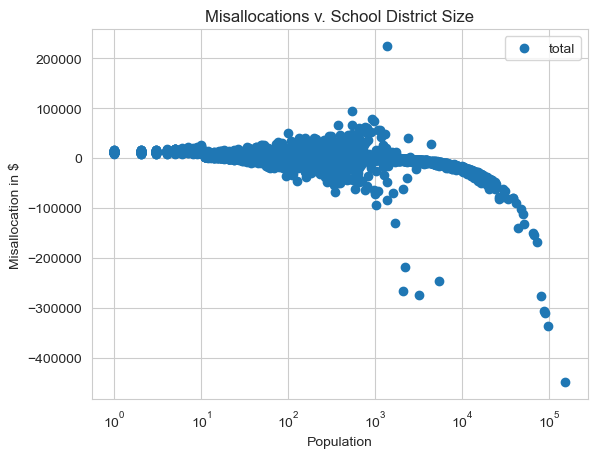

In [5]:
def plot_misallocations_over_all_states(allocs):
    for alloc in allocs:
        errors = (df[f'avg_noisy_{alloc}_alloc'] - df[f'calculated_{alloc}_alloc'])
        plt.scatter(df['official_children_formula_count'], errors, label=alloc)

    plt.title('Misallocations v. School District Size')
    plt.xlabel('Population')
    plt.ylabel('Misallocation in $')
    plt.xscale('log')
    plt.legend()
    plt.show()


# plot_misallocations_over_all_states(['basic', 'concentrated', 'targeted'])
plot_misallocations_over_all_states(['total'])



Text(0.5, 0.98, 'Misallocations per student v. # students per district')

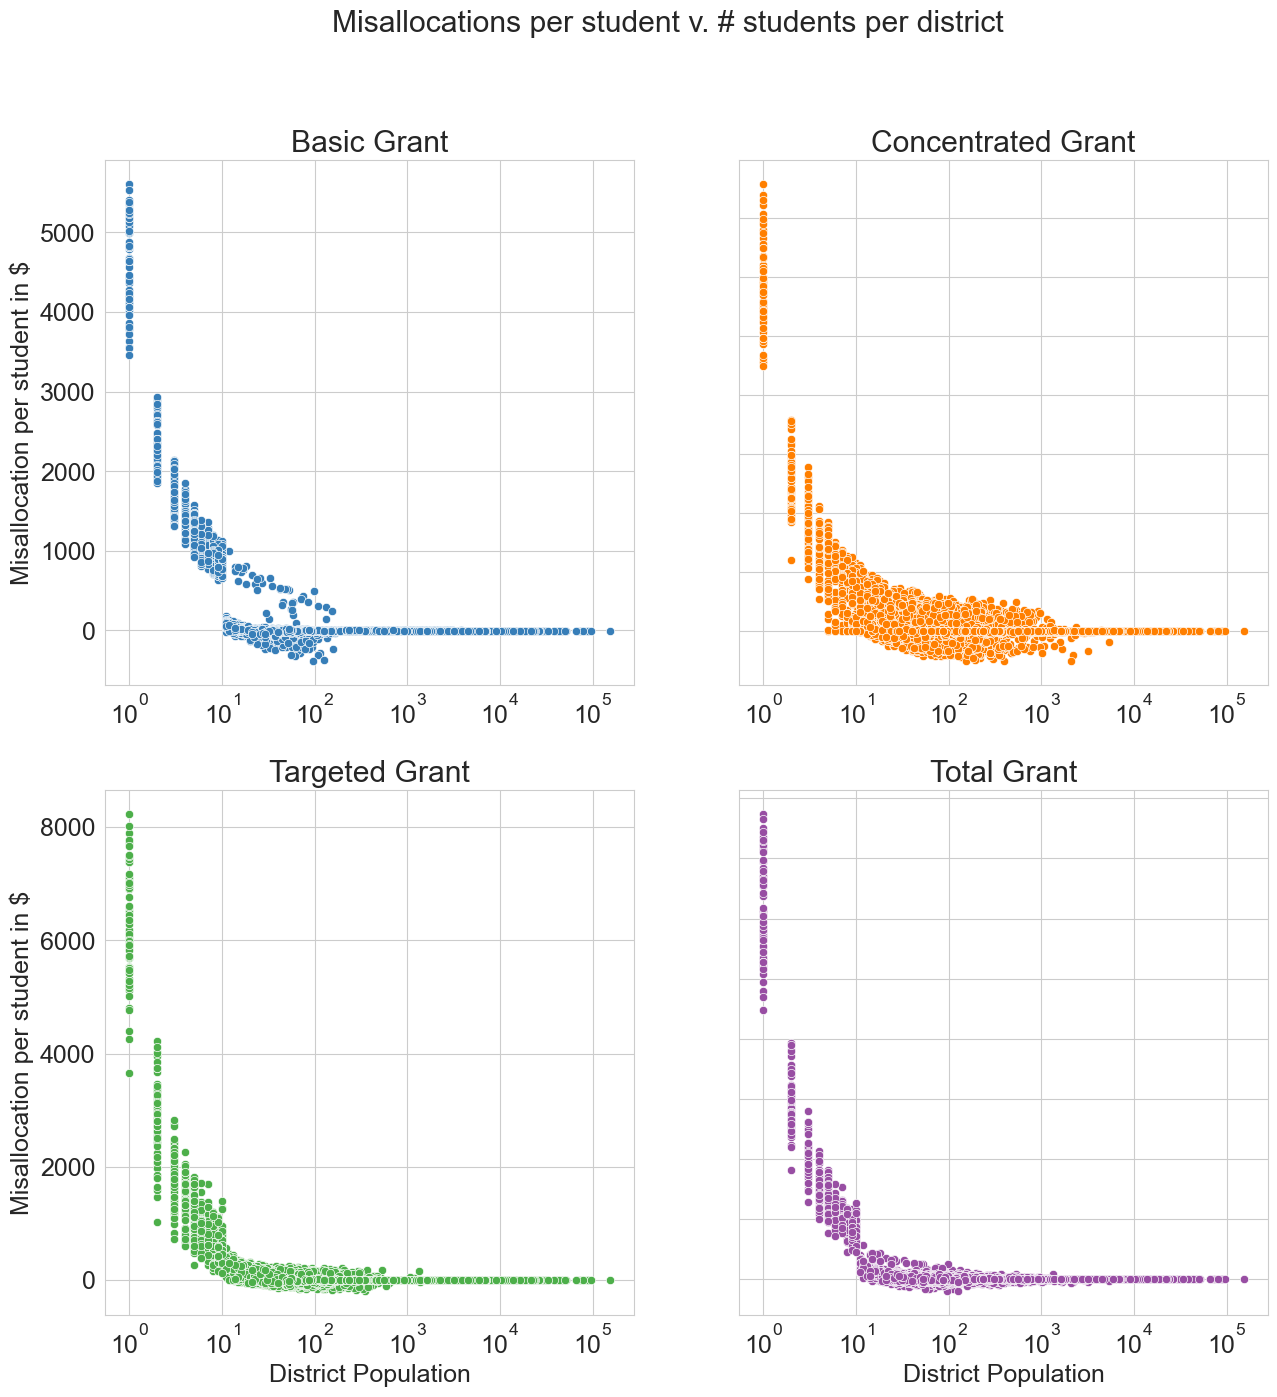

In [6]:
import seaborn as sns

# misallocations per capita
# x_axis = df['official_children_formula_count'] / df['official_children_count']
x_axis = df['official_children_formula_count']


def plot_per_capita_misallocations_over_all_states(alloc, normalized=False, ax=None, color=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    errors = df[f'avg_noisy_{alloc}_alloc'] - df[f'calculated_{alloc}_alloc']
    if normalized:
        errors = errors / df['official_children_formula_count']
    sns.scatterplot(x=x_axis, y=errors, color=color, ax=ax)

    ax.set_title(f'{alloc.capitalize()} Grant')
    ax.set_xlabel('District Population')
    ax.set_ylabel('Misallocation per student in $')
    ax.set_xscale('log')

    # Remove y-axis label for the second column's plots
    if ax.get_subplotspec().colspan.start == 1:
        ax.set_ylabel('')
        ax.set_yticklabels([])

    # Remove x-axis label for the first row of plots
    if ax.get_subplotspec().rowspan.start == 0:
        ax.set_xlabel('')


# Set font size
plt.rcParams.update({'font.size': 18})

# Plot color palette
colors = ["#377eb8", "#ff7f00", "#4daf4a", "#984ea3"]

# plot_misallocations_over_all_states(['basic', 'concentrated', 'targeted'])
normalized = True
# make 4 figure plot
keys = ["basic", "concentrated", "targeted", "total"]

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
for i, key in enumerate(keys):
    plot_per_capita_misallocations_over_all_states(key, normalized=normalized, ax=axs[i // 2, i % 2], color=colors[i])

fig.suptitle(f'Misallocations per student v. # students per district')


/Users/pranavputta/miniconda3/envs/titlei_fund_allocation/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


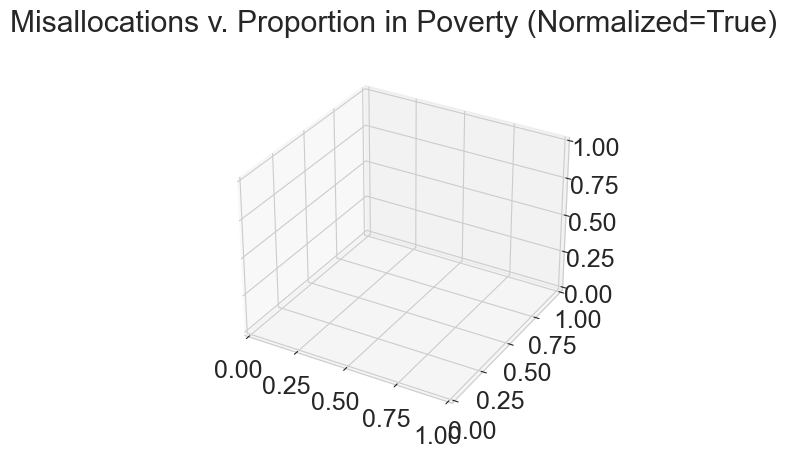

(13190,)


In [43]:
# misallocations per capita
x_axis = df['official_children_formula_count'] / df['official_children_count']
y_axis = df['official_children_count']


# x_axis = df['official_children_count']

def plot_per_capita_misallocations_over_all_states(alloc, normalized=False, ax=None, color=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    errors = df[f'avg_noisy_{alloc}_alloc'] - df[f'calculated_{alloc}_alloc']
    if normalized:
        errors = errors / df['official_children_formula_count']
    ax.scatter(x_axis, y_axis, errors, color=color)

    ax.set_title(f'{alloc.capitalize()} Grant')
    ax.set_xlabel('# of children')
    ax.set_ylabel('Misallocation in $')
    # ax.set_xscale('log')
    # ax.set_xlim(0, 0.8)
    # ax.legend()


# plot_misallocations_over_all_states(['basic', 'concentrated', 'targeted'])
normalized = True
# make 4 figure plot
keys = ["basic", "concentrated", "targeted", "total"]
colors = ["red", "blue", "green", "orange"]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot_per_capita_misallocations_over_all_states(key, normalized=normalized, ax=axs[i // 2, i % 2], color=colors[i])

fig.suptitle(f'Misallocations v. Proportion in Poverty (Normalized={normalized})')
plt.show()

# number of total schools
print(df['official_children_count'].shape)



In [44]:
df['official_children_formula_count'].sort_values()

767           0.0
4482          0.0
4402          0.0
345           0.0
7654          0.0
           ...   
10548     79787.0
2452      87467.0
8591      88475.0
8592      96647.0
1106     152946.0
Name: official_children_formula_count, Length: 13190, dtype: float64

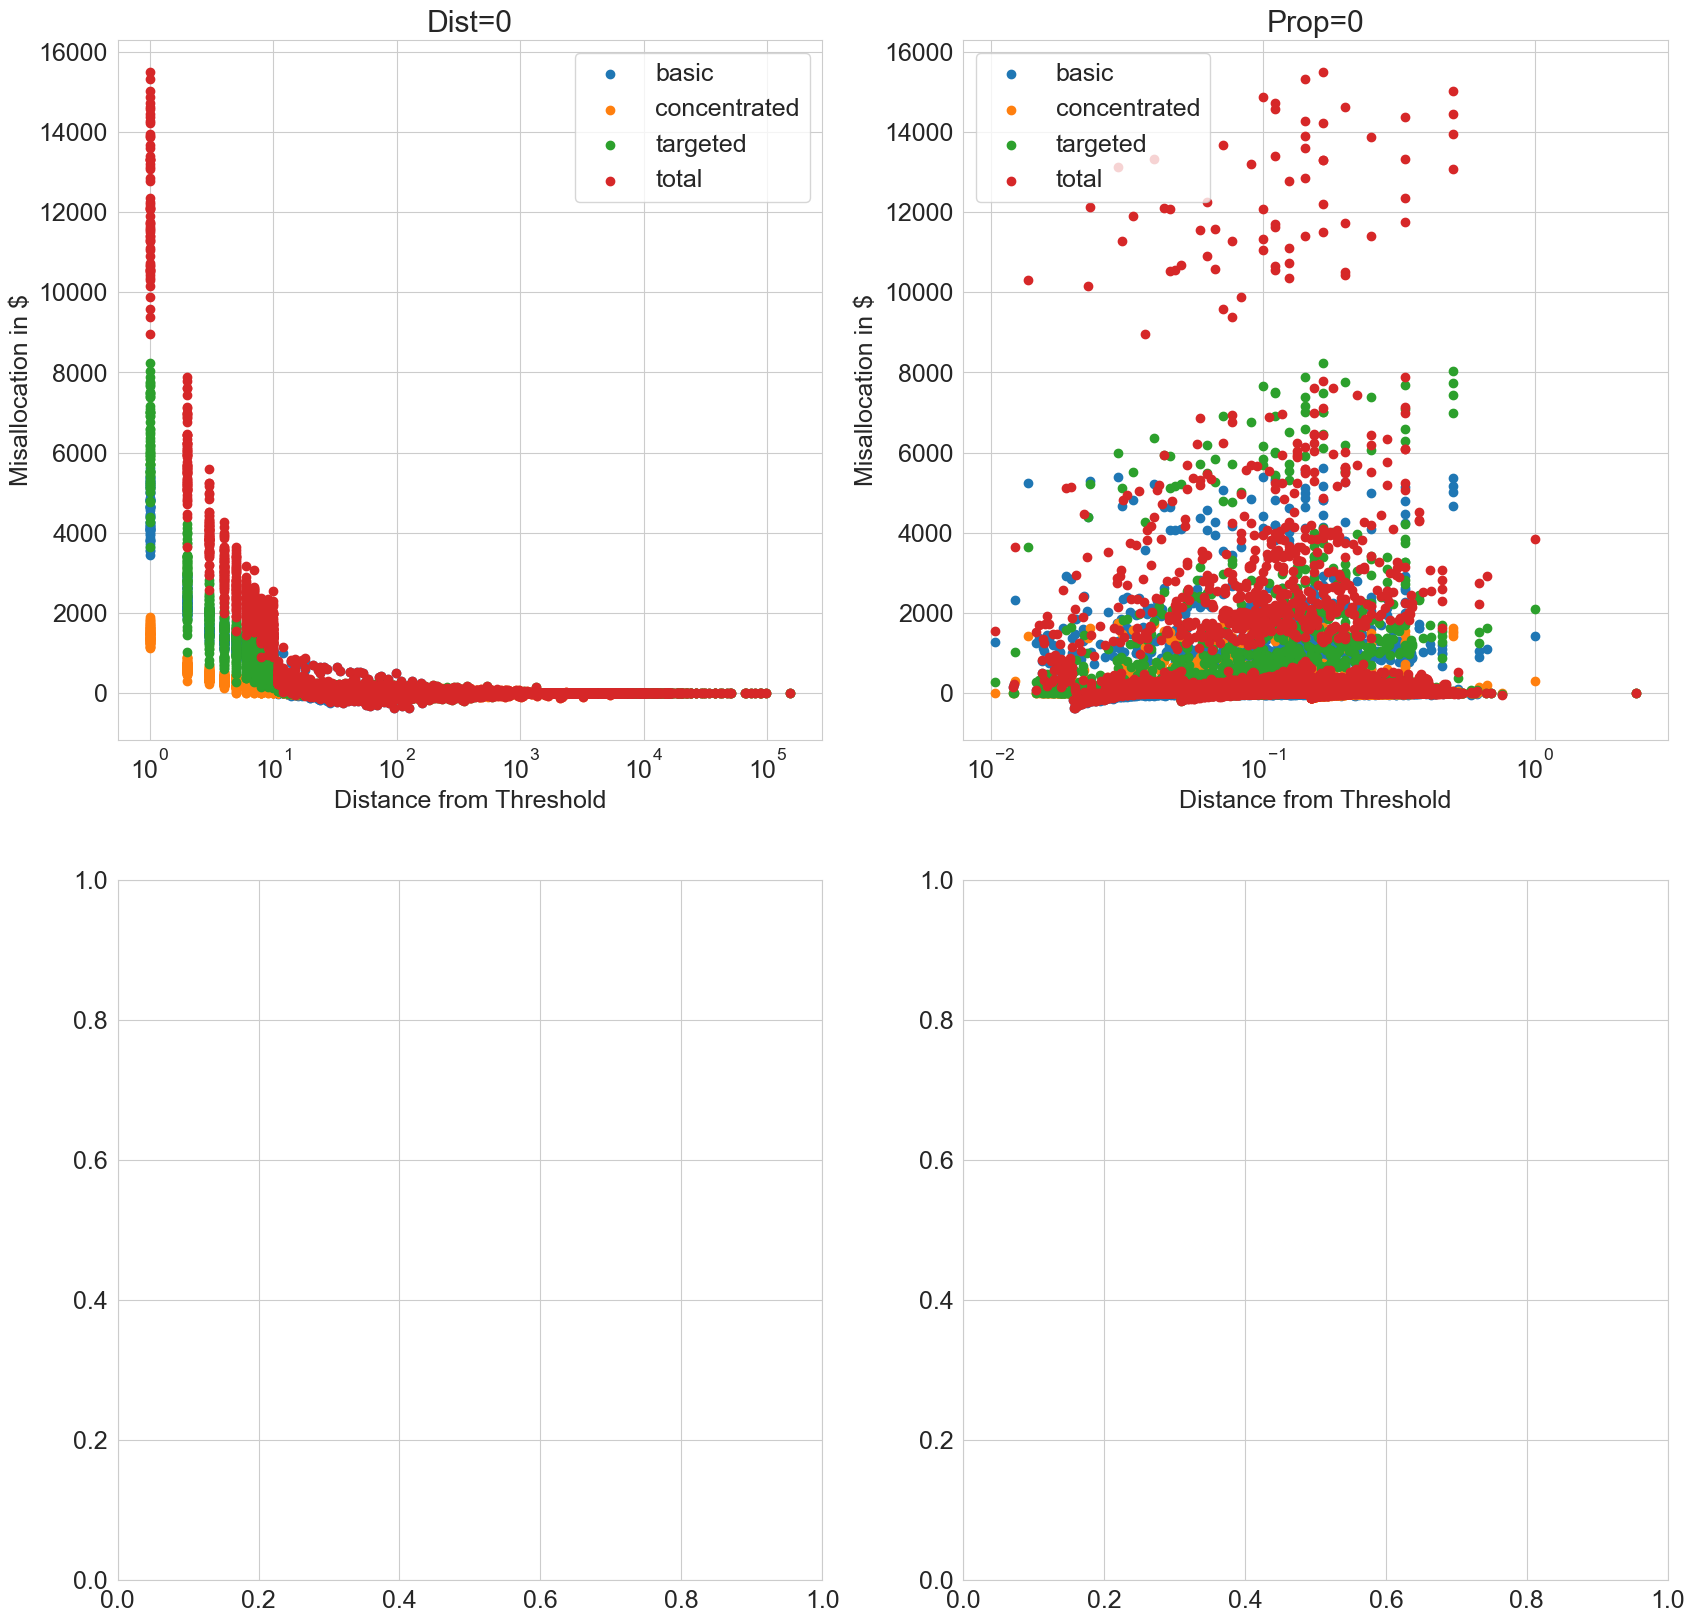

In [45]:
# misallocations v. distance from threshold
def misallocations_by_distance_from_threshold(allocs, ax, count_threshold=None, prop_threshold=None, normalized=False,
                                              title=None, log_scale=False):
    for alloc in allocs:
        errors = (df[f'avg_noisy_{alloc}_alloc'] - df[f'calculated_{alloc}_alloc'])
        if normalized:
            errors = errors / df['official_children_formula_count']

        if count_threshold is not None:
            x = df['official_children_formula_count']
            x = np.abs(x - count_threshold)
            ax.set_xscale('log')
        elif prop_threshold is not None:
            x = df['official_children_formula_count'] / df['official_children_count']
            x = np.abs(x - prop_threshold)

        ax.scatter(x, errors, label=alloc)

    ax.set_title(title)
    ax.set_xlabel('Distance from Threshold')
    ax.set_ylabel('Misallocation in $')
    if log_scale:
        ax.set_xscale('log')
    # ax.set_xlim(0, 0.2)
    ax.legend()


normalized = True
allocs = ['basic', 'concentrated', 'targeted', 'total']
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
misallocations_by_distance_from_threshold(allocs, axs[0, 0], count_threshold=0, title='Dist=0', normalized=normalized)
misallocations_by_distance_from_threshold(allocs, axs[0, 1], prop_threshold=0., title='Prop=0', normalized=normalized,
                                          log_scale=True)
#plt.title(f'Misallocations v. Dist from Threshold (Normalized={normalized})')


In [46]:
# Misallocations per State
df_grp_states = df.groupby('State FIPS Code')


def save_misallocs_per_state_graphs(allocs):
    for key in df_grp_states.groups.keys():
        df_state = df.loc[df_grp_states.groups[key]]
        state = df_state['State'].values[0]

        for alloc in allocs:
            errors = df_state[f'avg_noisy_{alloc}_alloc'] - df_state[f'calculated_{alloc}_alloc']

            # plt.scatter(df_state['official_children_count'], errors, label='total children pop')
            plt.scatter(df_state['official_children_formula_count'], errors, label=alloc)

        plt.title(state)
        plt.xlabel('Population')
        plt.ylabel('Misallocation in $')

        plt.xscale('log')

        save_loc = f'../out/plots/{file_name}/{state}.png'
        os.makedirs(os.path.dirname(save_loc), exist_ok=True)
        plt.legend()
        plt.savefig(save_loc)
        plt.clf()


save_misallocs_per_state_graphs(['basic', 'concentrated', 'targeted'])

<Figure size 640x480 with 0 Axes>

AttributeError: 'SeriesGroupBy' object has no attribute 'argmax'

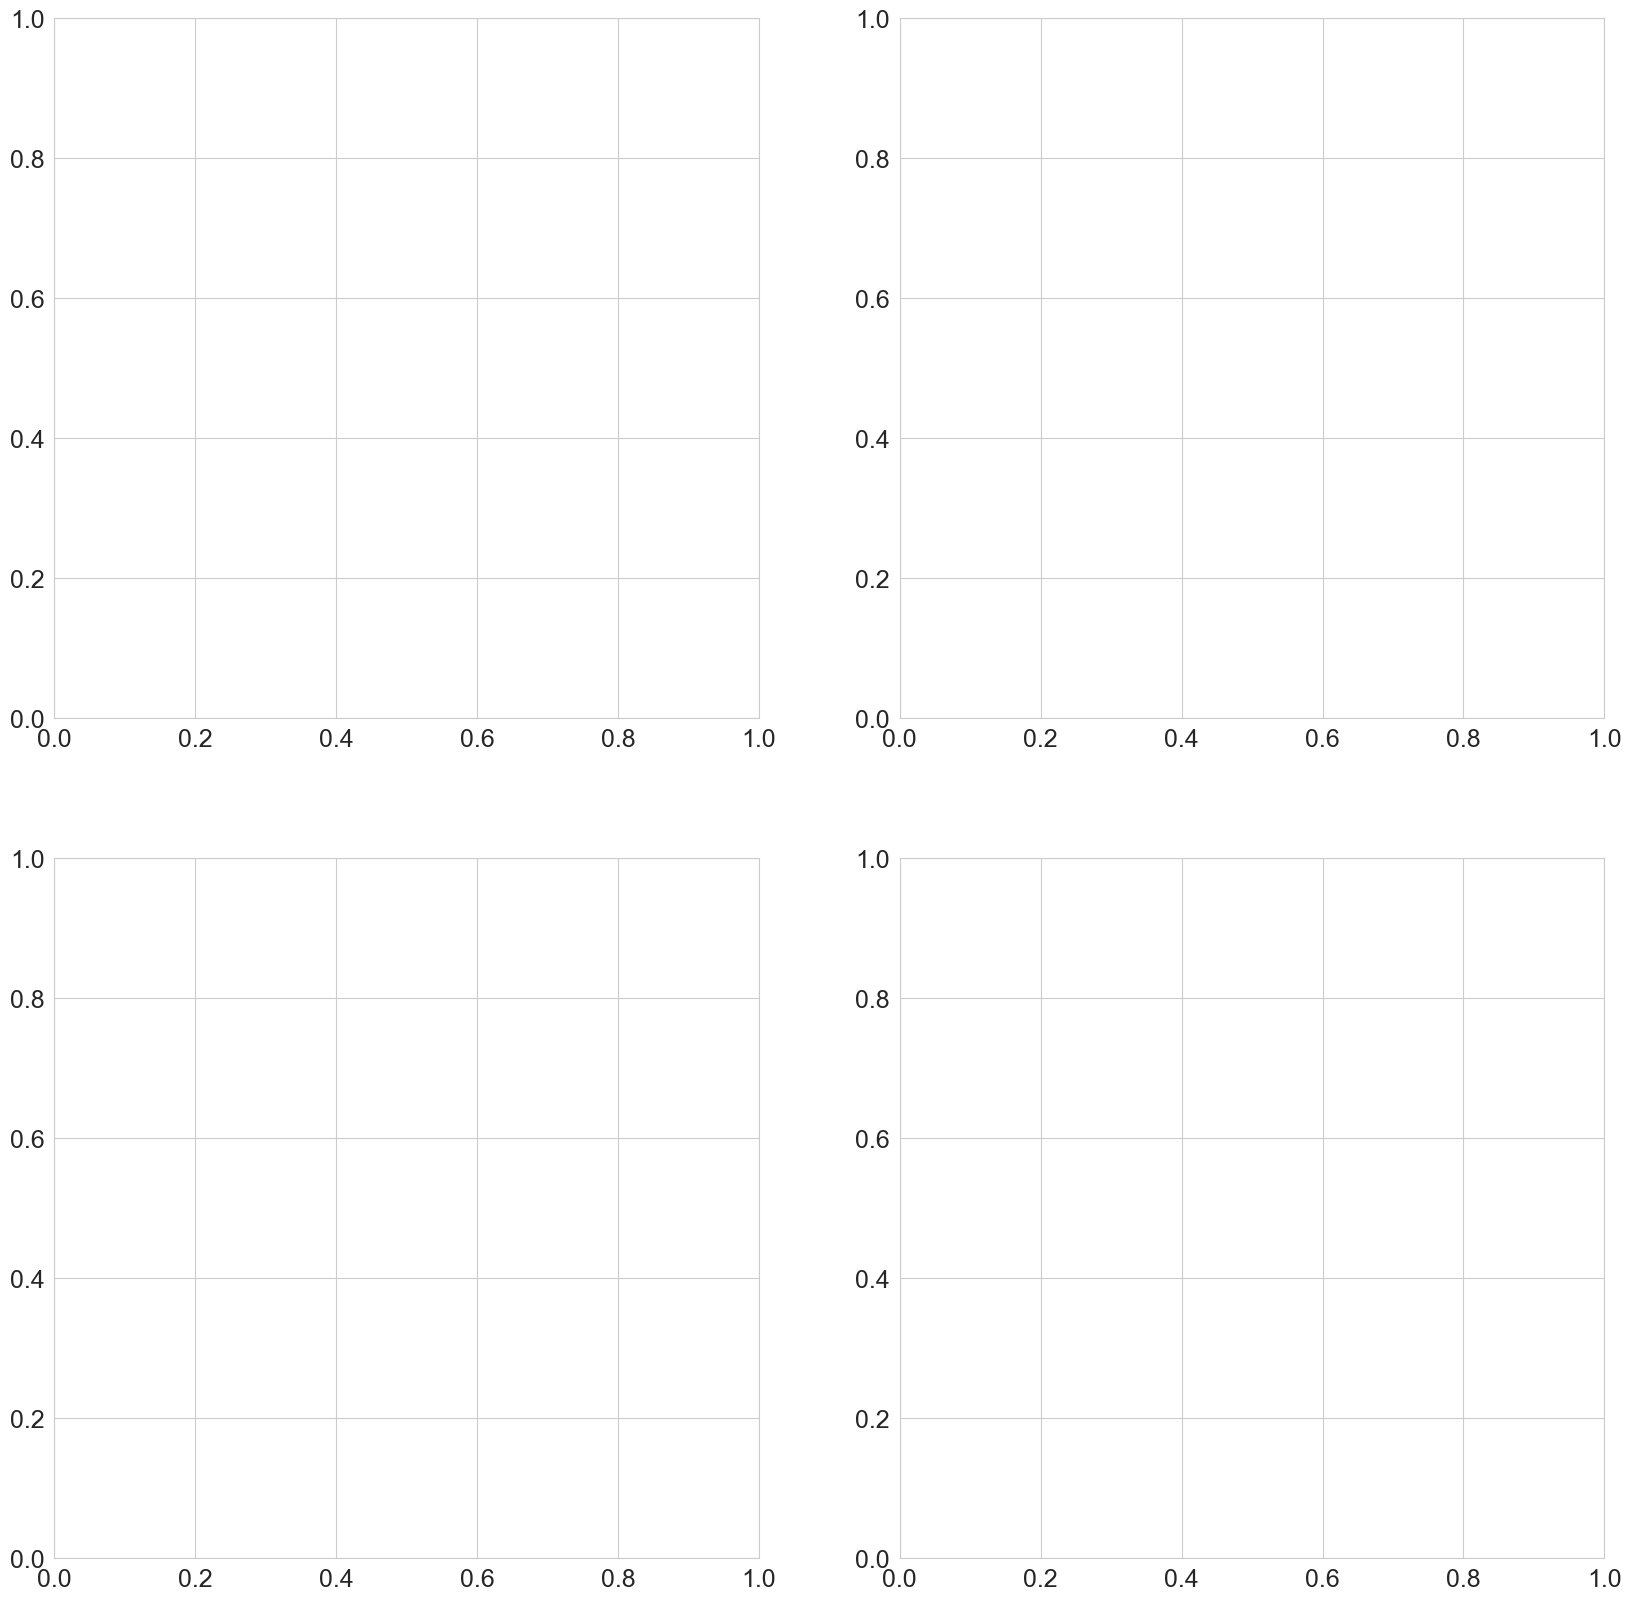

In [15]:
# plot average district size per state with alpha fairness
df_grp_state = df.groupby('State FIPS Code')
avg_by_state = df_grp_state['official_children_formula_count'].mean()
var_by_state = df_grp_state['official_children_formula_count'].var()
median_by_state = df_grp_state['official_children_formula_count'].median()
frac_poverty_by_state = df_grp_state['official_children_formula_count'].sum() / df_grp_state[
    'official_children_count'].sum()

df['frac_poverty'] = df['official_children_formula_count'] / df['official_children_count']
avg_district_frac_poverty_by_state = df_grp_state['frac_poverty'].mean()


# plot bias by some x arr
def plot_alpha_fairness_by_x(alloc, x, ax=None, xlabel=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    df[f'{alloc}_bias'] = df[f'avg_noisy_{alloc}_alloc'] - df[f'calculated_{alloc}_alloc']
    bias = df_grp_state[f'{alloc}_bias']
    print(bias.argmax())
    alpha_fairness = (bias.max() - bias.min()) / total_funds[alloc]
    ax.scatter(list(x), list(alpha_fairness))
    ax.set_title(f'{alloc.capitalize()} Grant')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Alpha Fairness')
    # set logscale
    #ax.set_xscale('log')


allocs = ['basic', 'concentrated', 'targeted', 'total']
xs = [avg_by_state]
xlabels = ['Variance District Size']

fig, axs = plt.subplots(2, 2, figsize=(20, 20))
for i, alloc in enumerate(allocs):
    plot_alpha_fairness_by_x(alloc, xs[0], ax=axs[i // 2, i % 2], xlabel=xlabels[0])



In [13]:
# create an empty list to hold the names of numerical columns
numerical_cols = []

# loop through each column and check if it contains numerical data
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        numerical_cols.append(col)

# calculate the correlation matrix for the numerical columns
corr_matrix = df[numerical_cols].corr()
corr_matrix.to_csv('/Users/pranavputta/Downloads/corr_matrix.csv')
corr_matrix

,State FIPS Code,District ID,basic_alloc,targeted_alloc,concentration_alloc,official_population_count,official_children_count,official_children_formula_count,saipe_population_count,saipe_children_count,...,avg_noisy_targeted_alloc,basic_error,concentrated_error,targeted_error,calculated_total_alloc,avg_noisy_total_alloc,official_children_formula_proportion,noisy_children_formula_proportion,total_alloc_error,total_alloc_error_per_student
State FIPS Code,1.000000,0.059330,-0.027336,-0.020979,-0.026243,-0.053623,-0.032685,-0.027949,-0.059756,-0.036686,...,-0.019927,-0.005274,0.008881,0.004606,-0.022810,-0.022832,-0.041660,-0.057828,0.006639,-0.031931
District ID,0.059330,1.000000,0.006871,0.016263,0.008218,-0.008525,-0.013535,-0.006302,-0.041146,-0.044179,...,0.016230,-0.003339,0.008585,-0.012790,0.011107,0.011117,-0.038317,-0.029104,-0.003633,-0.012154
basic_alloc,-0.027336,0.006871,1.000000,0.990505,0.994318,0.894214,0.901149,0.985845,0.901275,0.904603,...,0.989803,-0.501346,-0.208566,-0.820199,0.996767,0.996760,0.102725,0.068889,-0.720952,-0.039526
targeted_alloc,-0.020979,0.016263,0.990505,1.000000,0.989311,0.863457,0.869097,0.969634,0.872352,0.872847,...,0.999130,-0.488065,-0.202005,-0.823589,0.996569,0.996572,0.092615,0.066553,-0.716463,-0.026301
concentration_alloc,-0.026243,0.008218,0.994318,0.989311,1.000000,0.872016,0.877372,0.980114,0.874607,0.876047,...,0.988998,-0.493718,-0.212958,-0.817083,0.994914,0.994906,0.129688,0.095065,-0.719893,-0.032809
official_population_count,-0.053623,-0.008525,0.894214,0.863457,0.872016,1.000000,0.982156,0.915740,1.000000,0.981651,...,0.861144,-0.458898,-0.186294,-0.719488,0.876523,0.876507,-0.004247,-0.028384,-0.638409,-0.051970
official_children_count,-0.032685,-0.013535,0.901149,0.869097,0.877372,0.982156,1.000000,0.928809,0.981551,0.999995,...,0.867514,-0.462571,-0.188987,-0.724655,0.883832,0.883815,-0.000445,-0.025308,-0.643837,-0.052436
official_children_formula_count,-0.027949,-0.006302,0.985845,0.969634,0.980114,0.915740,0.928809,1.000000,0.920108,0.929392,...,0.969330,-0.495716,-0.205038,-0.805232,0.980060,0.980054,0.111332,0.075277,-0.708708,-0.041479
saipe_population_count,-0.059756,-0.041146,0.901275,0.872352,0.874607,1.000000,0.981551,0.920108,1.000000,0.981651,...,0.872014,-0.421526,-0.167159,-0.691203,0.886225,0.886207,-0.008010,-0.032786,-0.600651,-0.054441
saipe_children_count,-0.036686,-0.044179,0.904603,0.872847,0.876047,0.981651,0.999995,0.929392,0.981651,1.000000,...,0.873162,-0.422824,-0.168996,-0.691940,0.889039,0.889020,-0.004177,-0.029523,-0.602475,-0.054580


In [19]:
df_grp_states = df.groupby('State FIPS Code')
df.loc[df_grp_states.groups[6]]

,State FIPS Code,District ID,State,Name,basic_alloc,targeted_alloc,concentration_alloc,official_population_count,official_children_count,official_children_formula_count,...,concentrated_error,targeted_error,calculated_total_alloc,avg_noisy_total_alloc,official_children_formula_proportion,noisy_children_formula_proportion,total_alloc_error,total_alloc_error_per_student,frac_poverty,basic_bias
643,6,1620,CALIFORNIA,ABC Unified School District,1.707608e+06,9.045730e+05,264735.374292,108331.0,17163.0,2177.0,...,0.000000,-2487.874311,2.538095e+06,2.534188e+06,0.126843,0.126797,-3907.254663,-1.794789,0.126843,-1419.380352
644,6,1650,CALIFORNIA,Acalanes Union High School District,1.239329e+05,0.000000e+00,0.000000,118736.0,5953.0,158.0,...,0.000000,0.000000,1.195810e+05,1.191902e+05,0.026541,0.026582,-390.806753,-2.473460,0.026541,-390.806753
645,6,1680,CALIFORNIA,Ackerman Elementary School District,2.745350e+04,1.084248e+04,0.000000,2926.0,277.0,35.0,...,3814.763225,695.244583,3.716268e+04,4.147242e+04,0.126354,0.127013,4309.740021,123.135429,0.126354,-200.267786
646,6,1,CALIFORNIA,Acton-Agua Dulce Unified School District,1.560928e+05,6.164727e+04,0.000000,12882.0,1879.0,199.0,...,0.000000,24.267363,2.112964e+05,2.116667e+05,0.105907,0.106209,370.375148,1.861182,0.105907,346.107785
647,6,1710,CALIFORNIA,Adelanto Elementary School District,1.517786e+06,8.797393e+05,385138.103714,60637.0,7067.0,1935.0,...,-886.624861,-2394.960051,2.737042e+06,2.732713e+06,0.273808,0.273747,-4328.536067,-2.236970,0.273808,-1046.951155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,6,160,CALIFORNIA,Yosemite Unified School District,2.358814e+05,9.741362e+04,57745.362901,25051.0,2400.0,227.0,...,0.000000,-2.022524,2.410265e+05,2.413457e+05,0.094583,0.094789,319.207842,1.406202,0.094583,321.230365
1583,6,43380,CALIFORNIA,Yreka Union Elementary School District,2.361001e+05,1.441438e+05,59910.371689,9520.0,1016.0,301.0,...,24.657729,1344.890693,4.329436e+05,4.347370e+05,0.296260,0.296977,1793.456105,5.958326,0.296260,423.907683
1584,6,43410,CALIFORNIA,Yreka Union High School District,1.443270e+05,7.016960e+04,36622.951464,17255.0,826.0,184.0,...,-10.458911,1444.035225,2.469918e+05,2.485921e+05,0.222760,0.223402,1600.273766,8.697140,0.222760,166.697452
1585,6,43470,CALIFORNIA,Yuba City Unified School District,2.001752e+06,1.123746e+06,507944.413787,75425.0,14209.0,2552.0,...,-1041.335208,-2597.621578,3.573844e+06,3.569285e+06,0.179604,0.179620,-4558.067522,-1.786077,0.179604,-919.110735


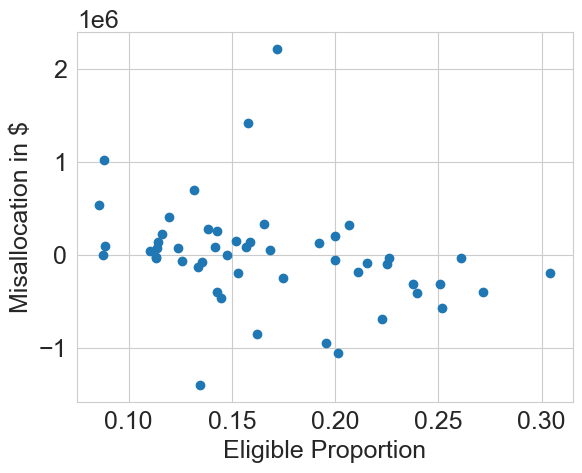

In [20]:
def plot_errors_by_x(alloc, x, log_scale=True, average=False, xlabel='Eligible Population'):
    df_state_by_state = {'errors': [], 'x': []}
    for key in list(df_grp_states.groups.keys()):
        df_state = df.loc[df_grp_states.groups[key]]
        errors = df_state[f'avg_noisy_{alloc}_alloc'] - df_state[f'calculated_{alloc}_alloc']

        df_state_by_state['errors'].append(errors.sum())
        df_state_by_state['x'].append(df_state[x].sum() / (1 if not average else len(df_state)))

    plt.scatter(df_state_by_state['x'], df_state_by_state['errors'])
    if log_scale:
        plt.xscale('log')
    plt.xlabel(xlabel)
    plt.ylabel('Misallocation in $')
    # plt.legend()
    plt.show()


plot_errors_by_x('total', 'official_children_formula_proportion', log_scale=False, average=True,
                 xlabel='Eligible Proportion')

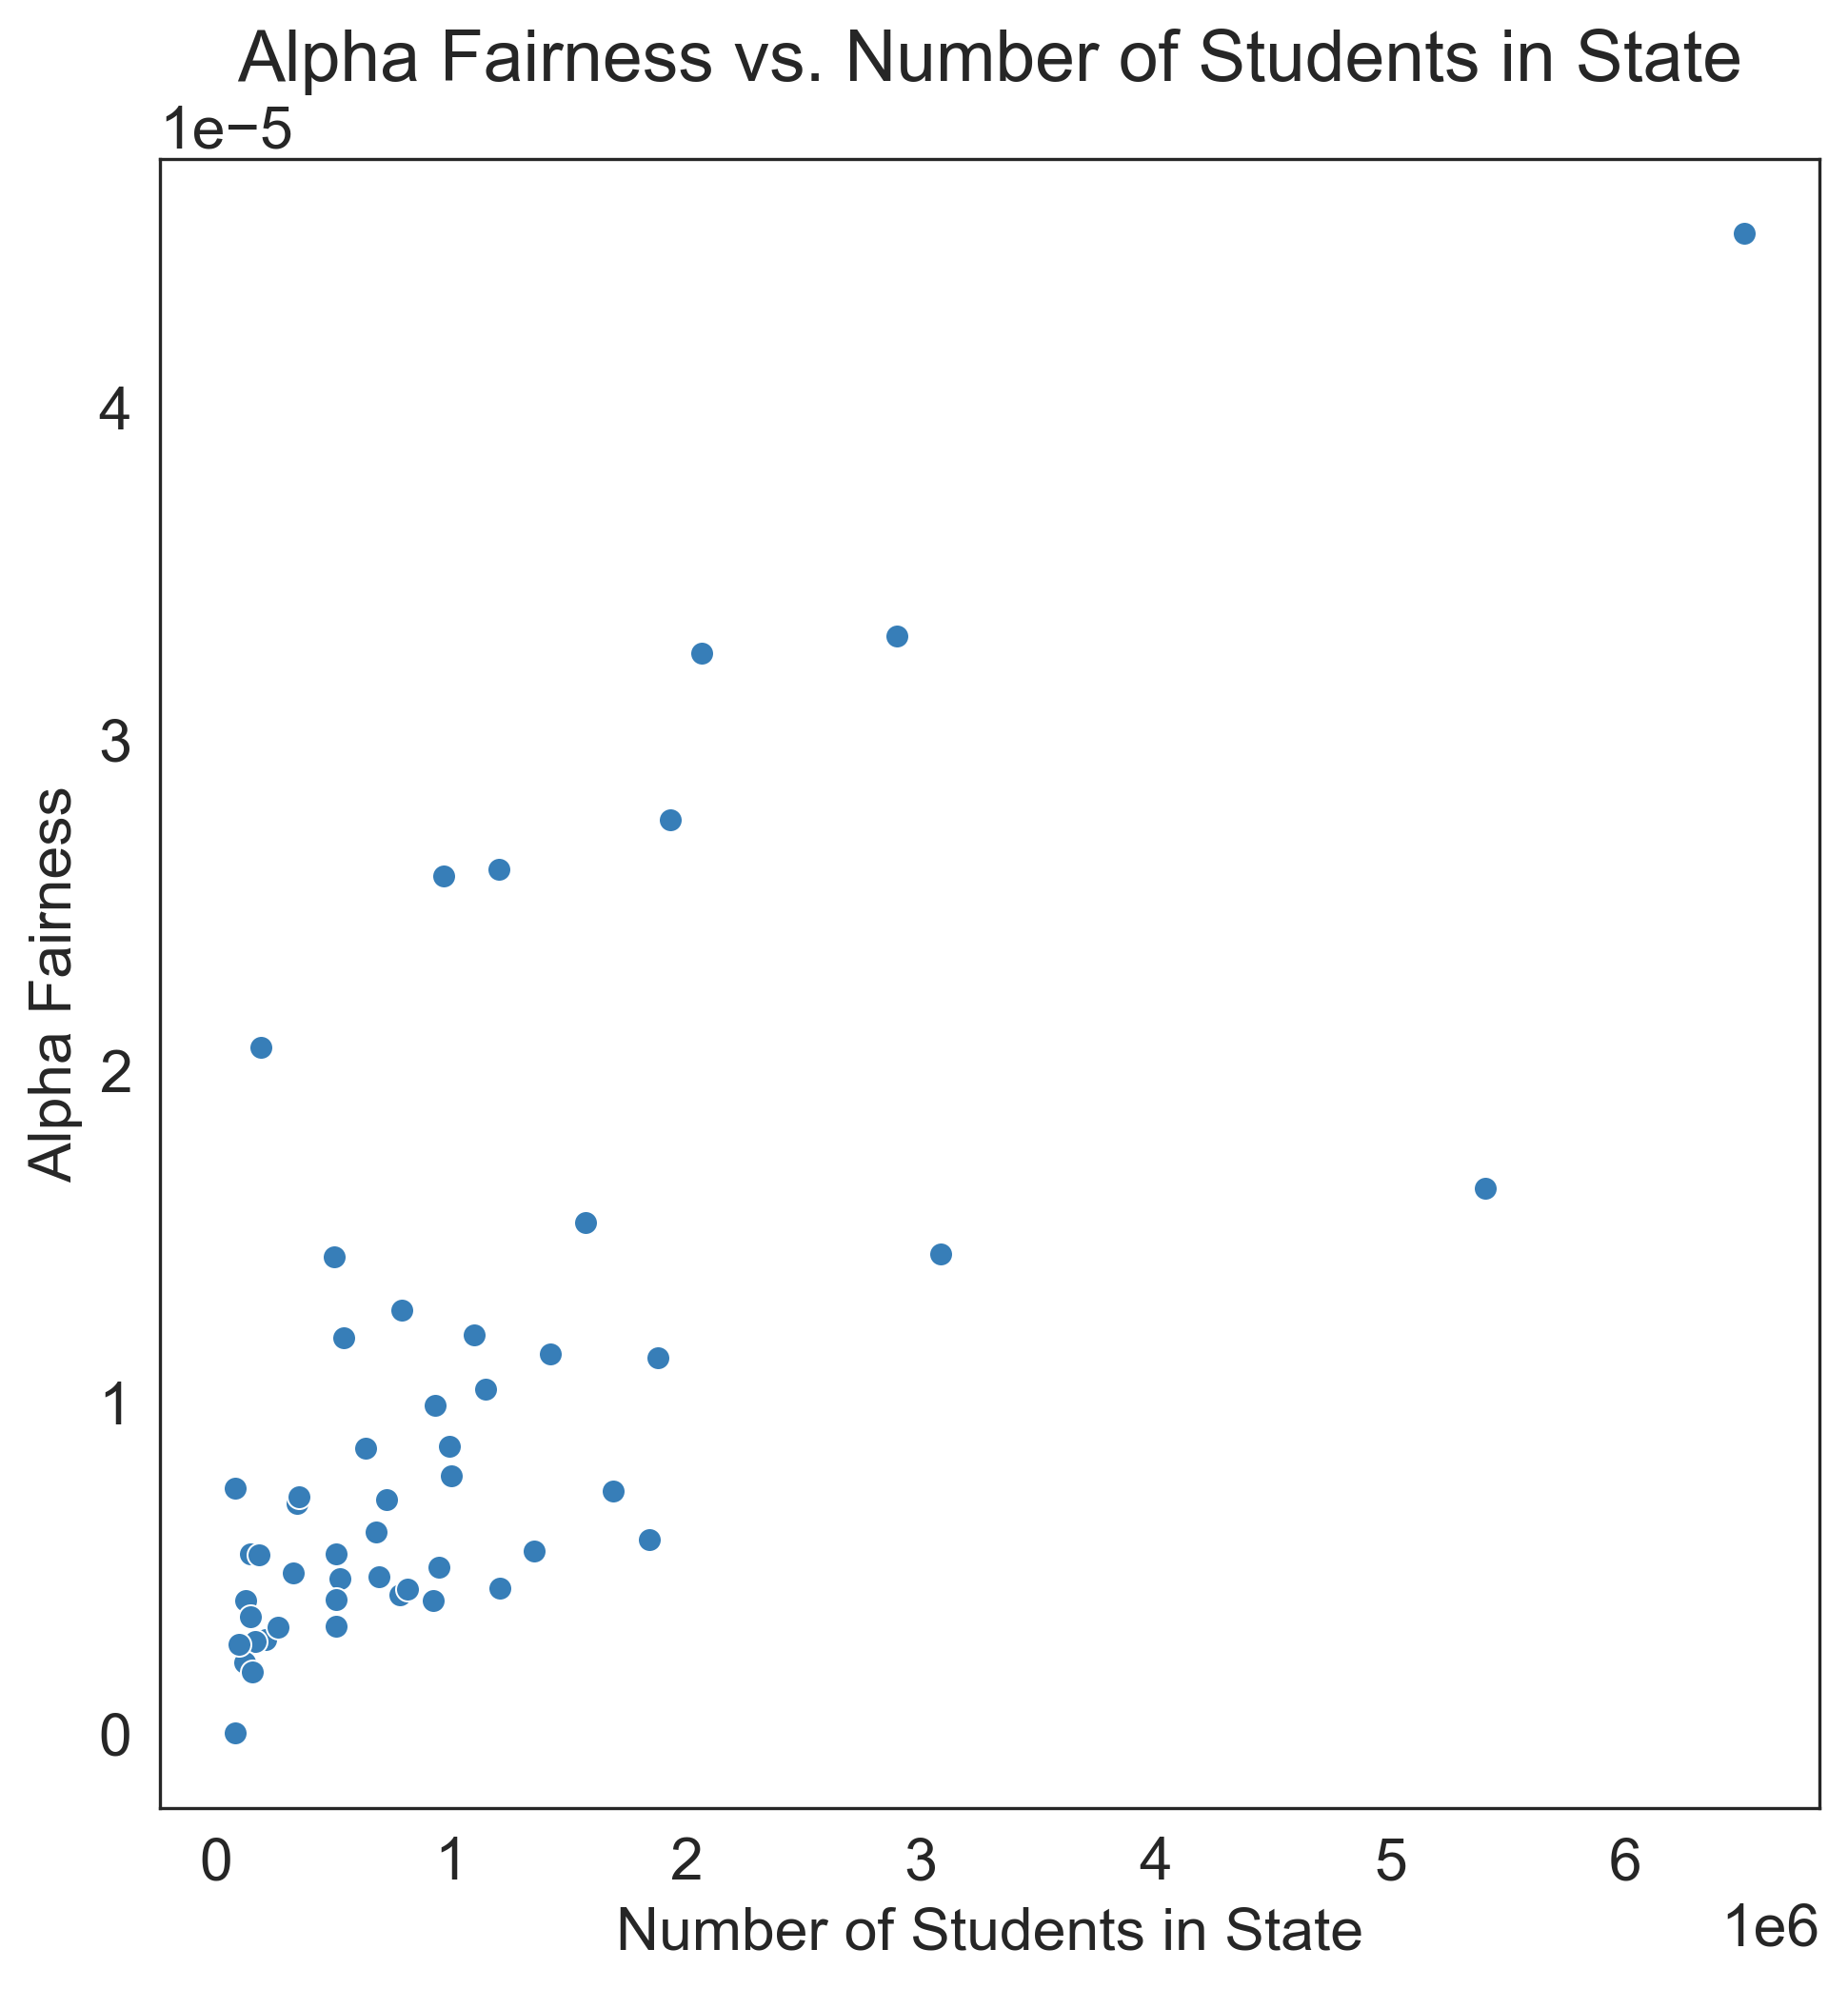

In [38]:
alloc = 'total'
df_state_by_state = {'errors': [], 'x': []}

# reduce global font size
plt.rcParams.update({'font.size': 15})
# set fig size
plt.figure(figsize=(7.5, 7.5))
sns.set_style('white')

for key in list(df_grp_states.groups.keys()):
    df_state = df.loc[df_grp_states.groups[key]]
    errors = df_state[f'avg_noisy_{alloc}_alloc'] - df_state[f'calculated_{alloc}_alloc']

    alpha_fairness = (max(errors) - min(errors)) / total_funds[alloc]
    df_state_by_state['errors'].append(alpha_fairness)
    df_state_by_state['x'].append((df_state['official_children_count'].sum()))

# plt.scatter(df_state_by_state['x'], df_state_by_state['errors'], c='#377eb8')
sns.scatterplot(x=df_state_by_state['x'], y=df_state_by_state['errors'], color='#377eb8')
# plt.xscale('log')
plt.xlabel('Number of Students in State')
plt.ylabel('Alpha Fairness')
plt.title('Alpha Fairness vs. Number of Students in State')
# plt.legend()
plt.gcf().set_dpi(300)
plt.show()


In [10]:
j_tmp = df[df['State'] == 'TEXAS']
e = np.abs(_tmp['avg_noisy_total_alloc'] - _tmp['calculated_total_alloc'])
_tmp['total_errors'] = e
_tmp = _tmp[e > 1000]
_tmp[['official_children_formula_count', 'official_children_count', 'calculated_basic_alloc', 'avg_noisy_basic_alloc',
      'calculated_concentrated_alloc', 'avg_noisy_concentration_alloc', 'calculated_targeted_alloc',
      'avg_noisy_target_alloc', 'calculated_total_alloc', 'avg_noisy_total_alloc', 'total_errors']].sort_values(
    by='official_children_count')


/var/folders/_0/j0skcttj3nx9079xgvyy1gt00000gn/T/ipykernel_3541/1661208037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _tmp['total_errors'] = e


,official_children_formula_count,official_children_count,calculated_basic_alloc,avg_noisy_basic_alloc,calculated_concentrated_alloc,avg_noisy_concentration_alloc,calculated_targeted_alloc,avg_noisy_target_alloc,calculated_total_alloc,avg_noisy_total_alloc,total_errors
11948,3.0,3.0,0.000000e+00,4.270025e+03,5.172358e+02,1.440226e+03,0.000000e+00,6.324317e+03,5.172358e+02,1.203457e+04,11517.332702
12062,4.0,12.0,0.000000e+00,4.884611e+03,6.896478e+02,1.576424e+03,0.000000e+00,6.797591e+03,6.896478e+02,1.325863e+04,12568.978494
11522,1.0,13.0,0.000000e+00,3.454387e+03,0.000000e+00,1.170761e+03,0.000000e+00,4.763841e+03,0.000000e+00,9.388989e+03,9388.988695
11492,2.0,13.0,0.000000e+00,4.029812e+03,3.448239e+02,1.301100e+03,0.000000e+00,5.620723e+03,3.448239e+02,1.095163e+04,10606.810173
11806,4.0,22.0,0.000000e+00,4.343386e+03,6.896478e+02,1.406665e+03,0.000000e+00,5.572348e+03,6.896478e+02,1.132240e+04,10632.752044
...,...,...,...,...,...,...,...,...,...,...,...
11162,14577.0,103519.0,9.053363e+06,9.048816e+06,2.513249e+06,2.508301e+06,7.767695e+06,7.749118e+06,1.933431e+07,1.930624e+07,28071.011480
11798,16521.0,110020.0,1.026073e+07,1.025518e+07,2.848418e+06,2.842702e+06,8.983880e+06,8.961996e+06,2.209302e+07,2.205988e+07,33144.576676
11350,16206.0,120145.0,1.006509e+07,1.005978e+07,2.794108e+06,2.788536e+06,8.786813e+06,8.765537e+06,2.164601e+07,2.161385e+07,32158.491859
11353,50220.0,193595.0,3.119022e+07,3.117365e+07,8.658528e+06,8.641231e+06,3.190710e+07,3.182970e+07,7.175585e+07,7.164459e+07,111260.047584


In [9]:
def interpolate_colors(start_color, end_color, num_steps):
    # Convert the start and end colors to RGB tuples
    start_rgb = tuple(int(start_color[i:i + 2], 16) for i in (0, 2, 4))
    end_rgb = tuple(int(end_color[i:i + 2], 16) for i in (0, 2, 4))

    # Compute the step size for each color channel
    step_size = [int((end - start) / (num_steps - 1)) for start, end in zip(start_rgb, end_rgb)]

    # Yield the interpolated colors
    for i in range(num_steps):
        # Compute the color values for this step
        r = start_rgb[0] + step_size[0] * i
        g = start_rgb[1] + step_size[1] * i
        b = start_rgb[2] + step_size[2] * i

        # Yield the color as a hex string
        yield "#{:02x}{:02x}{:02x}".format(r, g, b)


colors = interpolate_colors("0000ff", "ff0000", 50)
for key in list(df_grp_states.groups.keys())[:]:
    df_state = df.loc[df_grp_states.groups[key]]
    errors = df_state['avg_noisy_basic_alloc'] - df_state['calculated_basic_alloc']
    df_state['errors'] = errors
    plt.scatter(df_state['official_children_formula_count'], errors, label=df_state['State'].iloc[0])
plt.xscale('log')
plt.xlabel('Formula Population')
plt.ylabel('Misallocation in $')
# plt.legend()
plt.show()

(df_state[(errors.abs() > 2500) & (df_state['official_children_formula_count'] > 10)])



NameError: name 'df_grp_states' is not defined

In [8]:
# plot misallocation by fraction of population that is in poverty
for key in list(df_grp_states.groups.keys())[:]:
    df_state = df.loc[df_grp_states.groups[key]]
    errors = df_state['avg_noisy_basic_alloc'] - df_state['calculated_basic_alloc']
    frac_poverty = df_state['official_children_formula_count'] / df_state['official_children_count']
    df_state['errors'] = errors
    plt.scatter(frac_poverty, errors, label=df_state['State'].iloc[0])
plt.xscale('log')
plt.xlabel('Formula Population')
plt.ylabel('Misallocation in $')
# plt.legend()
plt.show()

(df_state[(errors.abs() > 2500) & (df_state['official_children_formula_count'] > 10)])



NameError: name 'df_grp_states' is not defined

In [7]:

from collections import defaultdict
from titlei_util import *


def get_sppe(path):
    fips_codes = pd.read_csv(f"datasets/fips_codes.csv").rename(
        columns={
            'FIPS': 'State FIPS Code'
        }
    )
    # quirk of original data file - need to change DC's name for join
    fips_codes.loc[fips_codes["Name"] == "District of Columbia", "Name"] = \
        "District Of Columbia Public Schools"
    sppe = pd.read_excel(path, header=2, engine='openpyxl') \
        .rename(columns={"Unnamed: 0": "Name"})[["Name", "ppe"]]
    return sppe.merge(fips_codes, on="Name", how="right") \
        .set_index("State FIPS Code")


sppe = (get_sppe('datasets/sppe18.xlsx'))

# compute alpha fairness

stats_by_state = defaultdict(lambda: [].copy())
total_funds = {
    'basic': df['basic_alloc'].sum(),
    'concentrated': df['concentration_alloc'].sum(),
    'targeted': df['targeted_alloc'].sum()
}
total_funds['total'] = total_funds['basic'] + total_funds['concentrated'] + total_funds['targeted']
for key in df_grp_states.groups.keys():
    for alloc in ['total']:
        # s = sppe[key]
        df_state = df.loc[df_grp_states.groups[key]]
        bias = (df_state[f'avg_noisy_{alloc}_alloc'] - df_state[f'calculated_{alloc}_alloc']) / (
            df_state['sppe'])  # * df_state['official_children_formula_count'])
        # drop nans and infs
        bias = bias[~bias.isin([np.nan, np.inf, -np.inf])]
        alpha_fairness = (max(bias) - min(bias)) / total_funds[alloc]
        total_children_population = sum(df_state['official_children_count'])
        formula_children_population = sum(df_state['official_children_formula_count'])
        total_population = sum(df_state['official_population_count'])

        stats_by_state['alpha_fairness'].append(alpha_fairness)
        stats_by_state['children_population'].append(total_children_population)
        stats_by_state['children_formula_population'].append(formula_children_population)
        stats_by_state['total_population'].append(total_population)
        stats_by_state['state'].append(df_state['State'].iloc[0])

stats_by_state_df = pd.DataFrame(stats_by_state)

# plot histogram
stats_by_state_df = stats_by_state_df.sort_values(by=['alpha_fairness'])
plt.figure(figsize=(15, 6))
plt.bar(stats_by_state_df['state'], stats_by_state_df['alpha_fairness'], label='alpha-fairness')
# plt.title('Basic')
plt.xticks(rotation=90)
plt.legend()
plt.show()




NameError: name 'df_grp_states' is not defined

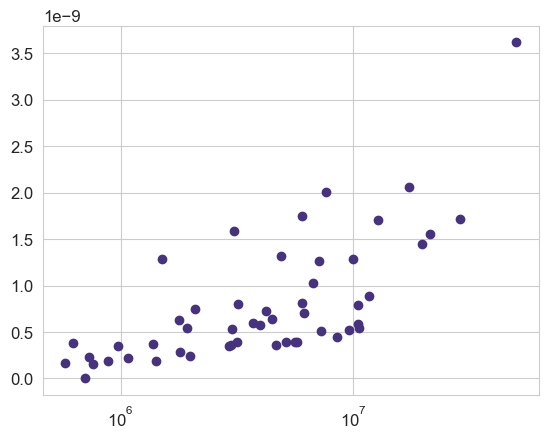

In [62]:
plt.scatter(stats_by_state_df['total_population'], stats_by_state_df['alpha_fairness'])
plt.xscale('log')


/var/folders/_0/j0skcttj3nx9079xgvyy1gt00000gn/T/ipykernel_98515/2781614054.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(bar_info, shrink=0.5)


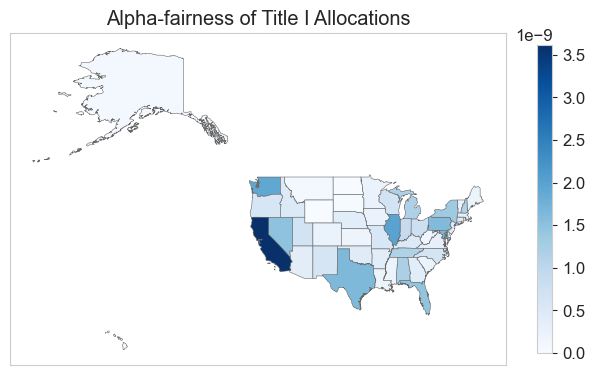

In [61]:
import geopandas as gpd

plt.rcParams.update({'font.size': 12})

usa = gpd.read_file('data_viz/states.shp')
usa['state'] = usa['state_name'].str.upper()
usa = usa.merge(stats_by_state_df, on='state')

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks([])
plt.yticks([])

values = stats_by_state_df['alpha_fairness']

usa.plot(column="alpha_fairness", cmap="Blues", linewidth=0.4, ax=ax, edgecolor=".4")
#
bar_info = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=np.min(values), vmax=np.max(values)))
bar_info._A = []
#make colorbar smaller
cbar = fig.colorbar(bar_info, shrink=0.5)
plt.title('Alpha-fairness of Title I Allocations')
plt.show()


In [ ]:
usa.keys()

In [ ]:
from titlei_util import *


def get_sppe(path):
    fips_codes = pd.read_csv(f"datasets/fips_codes.csv").rename(
        columns={
            'FIPS': 'State FIPS Code'
        }
    )
    # quirk of original data file - need to change DC's name for join
    fips_codes.loc[fips_codes["Name"] == "District of Columbia", "Name"] = \
        "District Of Columbia Public Schools"
    sppe = pd.read_excel(path, header=2, engine='openpyxl') \
        .rename(columns={"Unnamed: 0": "Name"})[["Name", "ppe"]]
    return sppe.merge(fips_codes, on="Name", how="right") \
        .set_index("State FIPS Code")


sppe = (get_sppe('datasets/sppe18.xlsx'))


In [47]:
sppe

,Name,ppe,Postal Code
State FIPS Code,,,
1,Alabama,9697,AL
2,Alaska,17726,AK
4,Arizona,8296,AZ
5,Arkansas,10072,AR
6,California,12510,CA
8,Colorado,10157,CO
9,Connecticut,19939,CT
10,Delaware,15289,DE
11,District Of Columbia Public Schools,22759,DC
